# I. bölüm

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import time


data = pd.read_csv("Crop_recommendation.csv")

data.head(50)


data1 = pd.read_csv("crop_production.csv")

In [29]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Text(0, 0.5, 'N örnek sayısı')

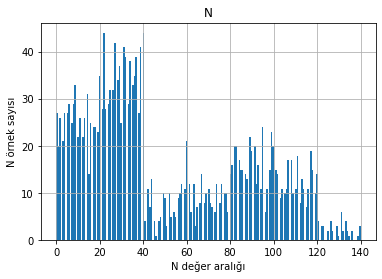

In [30]:
data.hist(column = "N",bins = 200)

plt.xlabel("N değer aralığı")
plt.ylabel("N örnek sayısı")

Text(0, 0.5, 'P örnek sayısı')

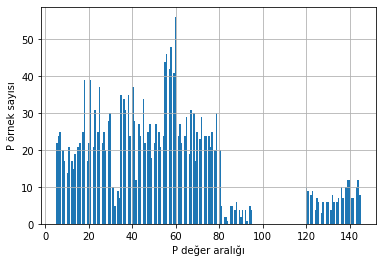

In [31]:
data["P"].hist(bins = 200)

plt.xlabel("P değer aralığı")
plt.ylabel("P örnek sayısı")

Text(0, 0.5, 'K örnek sayısı')

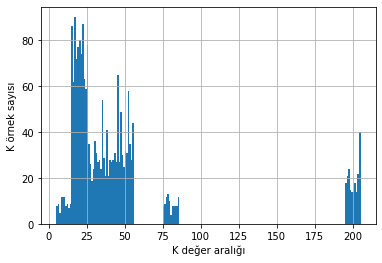

In [32]:
data["K"].hist(bins = 200)
plt.xlabel("K değer aralığı")
plt.ylabel("K örnek sayısı")

Text(0, 0.5, 'temperature örnek sayısı')

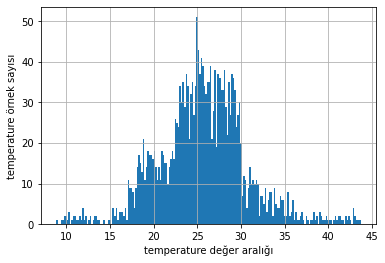

In [33]:
data["temperature"].hist(bins = 200)
plt.xlabel("temperature değer aralığı")
plt.ylabel("temperature örnek sayısı")

Text(0, 0.5, 'ph örnek sayısı')

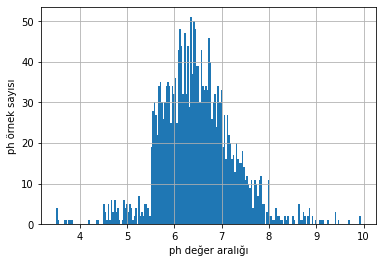

In [34]:
data["ph"].hist(bins = 200)
plt.xlabel("ph değer aralığı")
plt.ylabel("ph örnek sayısı")

Text(0, 0.5, 'rainfall örnek sayısı')

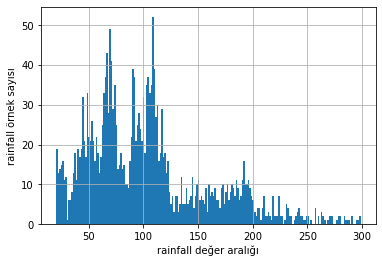

In [35]:
data["rainfall"].hist(bins = 200)
plt.xlabel("rainfall değer aralığı")
plt.ylabel("rainfall örnek sayısı")

Text(0, 0.5, 'humidity örnek sayısı')

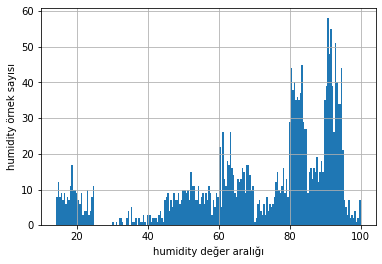

In [36]:
data["humidity"].hist(bins = 200)
plt.xlabel("humidity değer aralığı")
plt.ylabel("humidity örnek sayısı")

In [37]:
#data1

In [38]:
#data1["Crop"].unique()

In [39]:
#data1["District_Name"].unique()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [41]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [42]:
"""from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["label"] = le.fit_transform(data["label"])
"""

In [43]:
data.corr()


,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


In [44]:
Y = data.iloc[:,-1]
X = data.iloc[:,:-1]
X

Y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [46]:
y_test



array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

In [80]:
#karar ağaçları
start = time.time()
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy")

dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

end = time.time()

print("Karar ağaçları çalışma süresi", end - start)

Karar ağaçları çalışma süresi 0.043972015380859375


In [48]:
#knn algoritması

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3, metric = "minkowski")
knn.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)

end = time.time()

print("KNN çalışma süresi", end - start)



KNN çalışma süresi 1.12135910987854


In [49]:
x_test

array([[ 0.90671464,  0.13246256, -0.13855146, ...,  0.40507771,
         0.74210301,  2.25378567],
       [ 0.71957507, -0.35150288, -0.11894085, ...,  0.46349996,
         1.51561933,  2.90921165],
       [ 0.47896704, -0.50274208, -0.11894085, ...,  0.54374214,
         0.78842824,  2.69724773],
       ...,
       [ 1.4948676 , -0.5934856 , -0.31504692, ..., -0.22706006,
         0.40402665,  1.36536928],
       [ 1.2809938 , -1.16819456, -0.41309995, ..., -0.67148584,
        -0.50413321,  0.45934365],
       [ 1.78894407, -0.62373344, -0.35426813, ..., -0.19015584,
        -0.14292775,  1.28445986]])

In [82]:
#rassal orman algoritması

start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1,
                            random_state=0, max_depth= 15 )
rf.fit(x_train,y_train)

y_pred2 = rf.predict(x_test)

end = time.time()

print("Rassal Orman algoritması çalışma süresi", end - start)

Rassal Orman algoritması çalışma süresi 0.07193827629089355


In [51]:
start = time.time()
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb.fit(x_train,y_train)
y_pred3 = xgb.predict(x_test)


end = time.time()

print("XGBoost çalışma süresi", end - start)


XGBoost çalışma süresi 2.224308967590332


In [52]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)

cm1

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))

print("karar ağaçları değerlendirme metrikleri")
print_metrics(y_test, y_pred)


karar ağaçları değerlendirme metrikleri
Precision Score: 0.9849738276621657
Recall Score: 0.9829192611450676
Accuracy Score: 0.9834710743801653
F1 Score: 0.9837320169754306


In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))

print("k en yakın komşu değerlendirme metrikleri")
print_metrics(y_test, y_pred1)


k en yakın komşu değerlendirme metrikleri
Precision Score: 0.9735309887613259
Recall Score: 0.9749989041082827
Accuracy Score: 0.9724517906336089
F1 Score: 0.9734446495596113


In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))

print("Rassal Orman değerlendirme metrikleri")
print_metrics(y_test, y_pred2)



Rassal Orman değerlendirme metrikleri
Precision Score: 0.9958822091886609
Recall Score: 0.9960986594051111
Accuracy Score: 0.9958677685950413
F1 Score: 0.9959681831508324


In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))

print("XGBoost değerlendirme metrikleri")
print_metrics(y_test, y_pred3)

XGBoost değerlendirme metrikleri
Precision Score: 0.9892043579803294
Recall Score: 0.9874463127409631
Accuracy Score: 0.987603305785124
F1 Score: 0.9880475827118578


# II.bölüm

In [32]:
indian_data = pd.read_csv("indian_data1.csv")


indian_data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME_1      594 non-null    object 
 1   ph          594 non-null    float64
 2   Nitrogen    594 non-null    int64  
 3   Phosphorus  594 non-null    int64  
 4   Potassium   594 non-null    int64  
 5   first_temp  594 non-null    int64  
 6   sec_temp    594 non-null    int64  
 7   first_rain  594 non-null    int64  
 8   sec_rain    594 non-null    int64  
 9   first_hum   594 non-null    int64  
 10  sec_hum     594 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 51.2+ KB


In [31]:
indian_data.isna().sum()


NAME_1        0
ph            0
Nitrogen      0
Phosphorus    0
Potassium     0
first_temp    0
sec_temp      0
first_rain    0
sec_rain      0
first_hum     0
sec_hum       0
dtype: int64

In [33]:
x_first = indian_data[["Nitrogen","Phosphorus","Potassium","first_temp","first_hum","ph","first_rain"]]

x_sec = indian_data[["Nitrogen","Phosphorus","Potassium","sec_temp","sec_hum","ph","sec_rain"]]

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_first1 = sc.fit_transform(x_first)
x_sec1 = sc.fit_transform(x_sec)

In [35]:
#rassal orman algoritması

start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1,
                            random_state=0, max_depth= 13 )
rf.fit(x_train,y_train)

y_pred_first = rf.predict(x_first1)

y_pred_sec = rf.predict(x_sec1)

end = time.time()

print("Rassal Orman algoritması çalışma süresi", end - start)

Rassal Orman algoritması çalışma süresi 0.10399341583251953


In [47]:


y_pred_first1 = pd.DataFrame(y_pred_first)       # birinci 6 aylık dönem için bölgelere göre ürün haritası
writer = pd.ExcelWriter('y_pred_first.xlsx')
# write dataframe to excel
y_pred_first1.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [42]:
y_pred_sec

y_pred_sec1 = pd.DataFrame(y_pred_sec)

y_pred_sec1

,0
0,jute
1,orange
2,papaya
3,orange
4,papaya
...,...
589,apple
590,coconut
591,coconut
592,apple


In [48]:


y_pred_sec1 = pd.DataFrame(y_pred_sec)        # ikinci 6 aylık dönem için bölgelere göre ürün haritası
writer = pd.ExcelWriter('y_pred_sec.xlsx')
# write dataframe to excel
y_pred_sec1.to_excel(writer)                    
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
